<a href="https://colab.research.google.com/github/ChrisMunyi/Phase_3_Project/blob/main/Phase_3_Chris_Otieno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>[1.0 Exploratory Data Analysis (EDA)](#scrollTo=kALafOD7TlQR)

>>>[1.01. Data Overview](#scrollTo=kALafOD7TlQR)

>>>[1.02. Data Summary](#scrollTo=ptrxzssCTup0)

>>>[1.03. Class Distribution](#scrollTo=l3OOFWijTxv1)

>>>[1.04. Data Visualization](#scrollTo=Cw8ijzaQT0S1)

>>>[1.05. Feature Analysis](#scrollTo=Ch5xQGFuT2zM)

>>>[1.06. Correlation Analysis](#scrollTo=bh9WuX6BT4UW)

>>[2.0 Model Construction](#scrollTo=WCB9kOfxoZ0k)

>>>[2.01. Logistic Regression](#scrollTo=Bj-kflm9pKQC)

>>>[2.02. Decision Tree](#scrollTo=xZcS6GNhpeFl)

>>>[2.03. k-Nearest Neighbors](#scrollTo=eJSczgGRpgoD)

>>>[2.04. Naive Bayes](#scrollTo=2neDn8UGpkLD)



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [4]:
!wget --quiet https://github.com/ChrisMunyi/Phase_3_Project/raw/main/SyriaTel.csv

In [5]:
#column_names = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(30)]
#data = pd.read_csv("wdbc.data", names=column_names)
data = pd.read_csv("SyriaTel.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 1.0 Exploratory Data Analysis (EDA)

### 1.01. Data Overview

In [6]:
print("Data Overview:")
print(data.head())
print("\nData Info:")
print(data.info())

Data Overview:
  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07 

### 1.02. Data Summary

In [7]:
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
       account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.06

### 1.03. Class Distribution

In [8]:
print("\nClass Distribution:")
print(data["churn"].value_counts())


Class Distribution:
False    2850
True      483
Name: churn, dtype: int64


### 1.04. Data Visualization

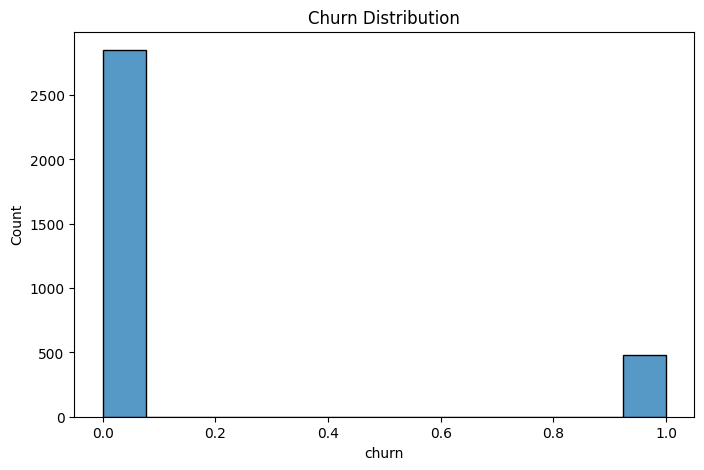

In [9]:
plt.figure(figsize=(8, 5))
data["churn"] = data["churn"].replace(to_replace=[False, True], value=[0, 1])
sns.histplot(data["churn"])
plt.title("Churn Distribution")
plt.show()

### 1.05. Feature Analysis

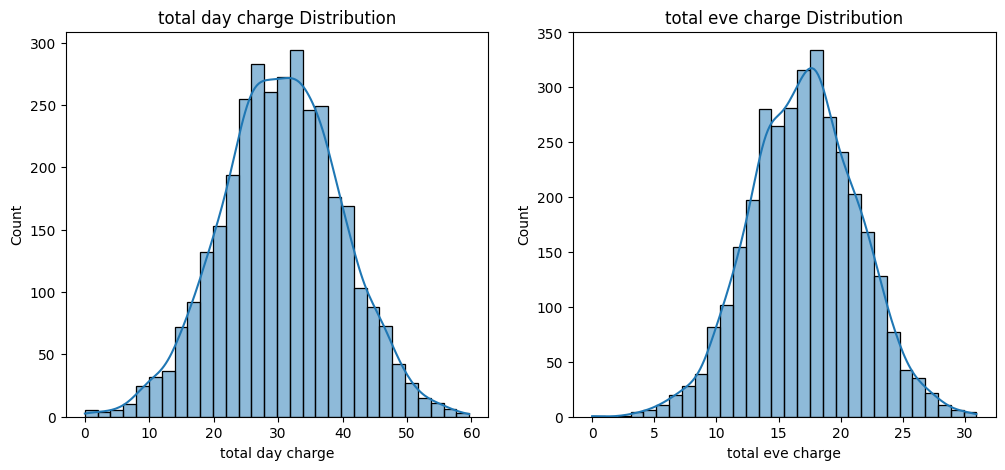

In [10]:
# Step 5: Feature Analysis
# We compare the distributions of charges per day and during the evening"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data["total day charge"], bins=30, kde=True)
plt.title("total day charge Distribution")
plt.subplot(1, 2, 2)
sns.histplot(data["total eve charge"], bins=30, kde=True)
plt.title("total eve charge Distribution")
plt.show()

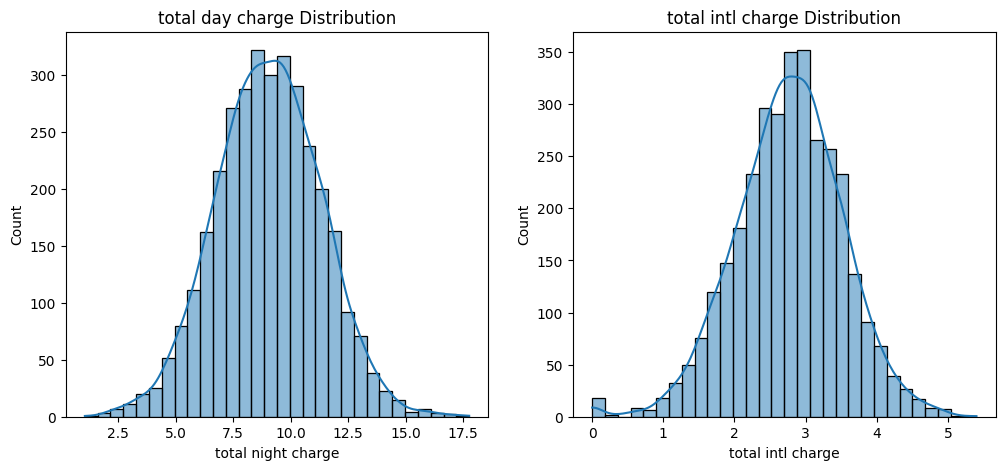

In [11]:
# We compare the distributions of charges per night and internationally"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data["total night charge"], bins=30, kde=True)
plt.title("total day charge Distribution")
plt.subplot(1, 2, 2)
sns.histplot(data["total intl charge"], bins=30, kde=True)
plt.title("total intl charge Distribution")
plt.show()

### 1.06. Correlation Analysis

<ipython-input-12-ff22f7196410>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


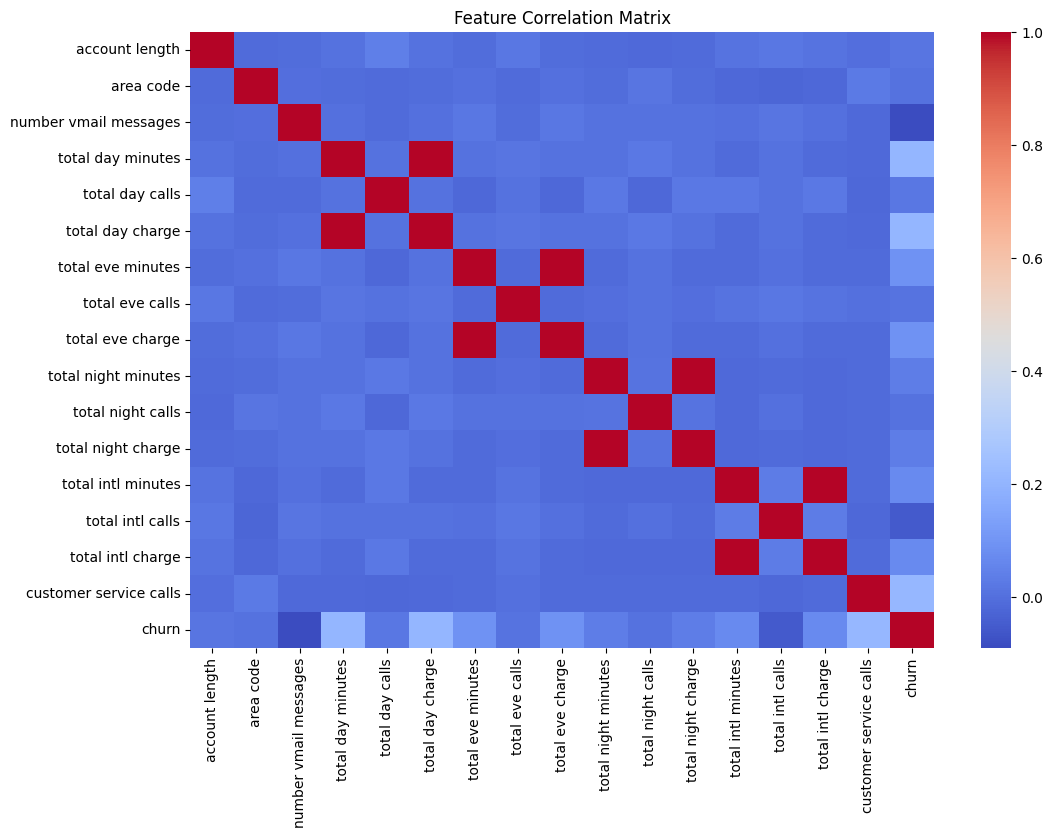

In [12]:
# Visualize the correlation matrix as a heatmap
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Feature Correlation Matrix")
plt.show()

## 2.0 Model Construction

In [13]:
# Split the data into features (X) and target (y)
data.drop(['state'], axis=1, inplace=True)

In [16]:
data['international plan'] = data['international plan'].replace(['yes', 'no'], value=[1, 0])

In [18]:
data['voice mail plan'] = data['voice mail plan'].replace(['yes', 'no'], value=[1, 0])

In [19]:
data.head()

,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [20]:
X = data.drop(['churn', 'area code', 'phone number', ], axis=1)
y = data['churn']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


In [23]:
X_test.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
438,113,0,0,0,155.0,93,26.35,330.6,106,28.10,189.4,123,8.52,13.5,3,3.65,1
2674,67,0,0,0,109.1,117,18.55,217.4,124,18.48,188.4,141,8.48,12.8,6,3.46,0
1345,98,0,0,0,0.0,0,0.00,159.6,130,13.57,167.1,88,7.52,6.8,1,1.84,4
1957,147,0,0,0,212.8,79,36.18,204.1,91,17.35,156.2,113,7.03,10.2,2,2.75,1
2148,96,0,0,0,144.0,102,24.48,224.7,73,19.10,227.7,91,10.25,10.0,7,2.70,1


In [24]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.01. Logistic Regression

In [25]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

### 2.02. Decision Tree

In [27]:
# Decision Trees
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

### 2.03. k-Nearest Neighbors

In [28]:
# k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

### 2.04. Naive Bayes

In [29]:
# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
y_pred_naive_bayes = naive_bayes_model.predict(X_test)

We write a simple function to perform model evaluation and which we will use to pass all our models to for evaluation

In [32]:
# Model Evaluation Function
def evaluate_model(model, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred)
    return accuracy, conf_matrix, class_report

We evaluate each model by passing it to `evaluate_model()` and then print out its metrics

In [33]:
# Evaluate each model
accuracy_logistic, conf_matrix_logistic, class_report_logistic = evaluate_model(logistic_model, y_test, y_pred_logistic)
print(f"Accuracy of Logistic Regression Model: ", accuracy_logistic)
print(f"Confusion Matrix of Logistic Regression Model: ", conf_matrix_logistic)
print(f"Class Report of Logistic Regression Model: ", class_report_logistic)
#accuracy_xgboost, conf_matrix_xgboost, class_report_xgboost = evaluate_model(xgboost_model, y_test, y_pred_xgboost)

# Display model performance

Accuracy of Logistic Regression Model:  0.856071964017991
Confusion Matrix of Logistic Regression Model:  [[553  13]
 [ 83  18]]
Class Report of Logistic Regression Model:                precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667



In [34]:
accuracy_decision_tree, conf_matrix_decision_tree, class_report_decision_tree = evaluate_model(decision_tree_model, y_test, y_pred_decision_tree)
print(f"Accuracy of Decision Tree Model: ", accuracy_decision_tree)
print(f"Confusion Decision Tree Model: ", conf_matrix_decision_tree)
print(f"Class Report of Decision Tree Model: ", class_report_decision_tree)

Accuracy of Decision Tree Model:  0.9235382308845578
Confusion Decision Tree Model:  [[540  26]
 [ 25  76]]
Class Report of Decision Tree Model:                precision    recall  f1-score   support

           0       0.96      0.95      0.95       566
           1       0.75      0.75      0.75       101

    accuracy                           0.92       667
   macro avg       0.85      0.85      0.85       667
weighted avg       0.92      0.92      0.92       667



In [35]:
accuracy_knn, conf_matrix_knn, class_report_knn = evaluate_model(knn_model, y_test, y_pred_knn)
print(f"Accuracy of K-Nearest Neighbors Model: ", accuracy_knn)
print(f"Confusion Matrix of K-Nearest Neighbors Model: ", conf_matrix_knn)
print(f"Class Report of K-Nearest Neighbors Model: ", class_report_knn)

Accuracy of K-Nearest Neighbors Model:  0.8950524737631185
Confusion Matrix of K-Nearest Neighbors Model:  [[560   6]
 [ 64  37]]
Class Report of K-Nearest Neighbors Model:                precision    recall  f1-score   support

           0       0.90      0.99      0.94       566
           1       0.86      0.37      0.51       101

    accuracy                           0.90       667
   macro avg       0.88      0.68      0.73       667
weighted avg       0.89      0.90      0.88       667



In [36]:
accuracy_naive_bayes, conf_matrix_naive_bayes, class_report_naive_bayes = evaluate_model(naive_bayes_model, y_test, y_pred_naive_bayes)
print(f"Accuracy of Naive Bayes Model: ", accuracy_naive_bayes)
print(f"Confusion Matrix of Naive Bayes Model: ", conf_matrix_naive_bayes)
print(f"Class Report of Naive Bayes Model: ", class_report_naive_bayes)

Accuracy of Naive Bayes Model:  0.8545727136431784
Confusion Matrix of Naive Bayes Model:  [[522  44]
 [ 53  48]]
Class Report of Naive Bayes Model:                precision    recall  f1-score   support

           0       0.91      0.92      0.91       566
           1       0.52      0.48      0.50       101

    accuracy                           0.85       667
   macro avg       0.71      0.70      0.71       667
weighted avg       0.85      0.85      0.85       667

